In [111]:
pip install dmba

In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
import json
import pickle
import shutil
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime,timedelta
from sklearn.impute import SimpleImputer
from matplotlib.gridspec import GridSpec
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import CountVectorizer




import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
# Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.model_selection import cross_validate


#Tree
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Seaborn
import seaborn as sns

import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

warnings.filterwarnings("ignore")

In [113]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:

df_combined_data= pd.read_csv("/content/drive/MyDrive/BDA Data/combined_data.csv")
df_inpatient= pd.read_csv("/content/drive/MyDrive/BDA Data/combined_inpatient.csv")
df_outpatient= pd.read_csv("/content/drive/MyDrive/BDA Data/combined_outpatient.csv")
df_beneficiary= pd.read_csv("/content/drive/MyDrive/BDA Data/combined_beneficiary.csv")

In [116]:
def combine_data(provider, beneficiary, inpatient, outpatient):
    ''' This function combines provider, beneficiary, inpatient and outpatient data
        together in a single file. '''
    # Finding common columns in inpatient data and outpatient data
    common_inp_outp = [col for col in inpatient if col in outpatient]
    # Outer joining inpatient data and outpatient data using common columns
    in_out = outpatient.merge(inpatient, on=common_inp_outp, how='outer', indicator='is_inpatient')
    in_out = in_out.replace({'left_only':0, 'right_only':1})
    # Inner joining beneficary data and combination of inpatient and outpatient
    train_benef_in_out = beneficiary.merge(in_out, on='BeneID')
    # Combining all combinations with train data containing target variable
    combined_data = provider.merge(train_benef_in_out, on='Provider')
    return combined_data

In [117]:
ins_data = combine_data(df_combined_data, df_beneficiary, df_inpatient, df_outpatient)
print("Shape of data: ", ins_data.shape)
ins_data.head()

Shape of data:  (1057416, 56)


,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,No,BENE11727,1930-05-01,NaN,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,No,BENE24646,1943-03-01,NaN,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,No,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,No,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
4,PRV51001,No,BENE32715,1936-03-01,NaN,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0


In [118]:
ins_data['PotentialFraud'] = ins_data['PotentialFraud'].replace({'Yes':1, 'No':0})
ins_data.PotentialFraud.value_counts()

PotentialFraud
0.0    505531
1.0    300962
Name: count, dtype: int64

No of Null values


In [119]:
ins_data.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimID',
       'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
  

In [120]:
ins_data.isna().sum()

Provider                                 0
PotentialFraud                      250923
BeneID                                   0
DOB                                      0
DOD                                1050029
Gender                                   0
Race                                     0
RenalDiseaseIndicator                    0
State                                    0
County                                   0
NoOfMonths_PartACov                      0
NoOfMonths_PartBCov                      0
ChronicCond_Alzheimer                    0
ChronicCond_Heartfailure                 0
ChronicCond_KidneyDisease                0
ChronicCond_Cancer                       0
ChronicCond_ObstrPulmonary               0
ChronicCond_Depression                   0
ChronicCond_Diabetes                     0
ChronicCond_IschemicHeart                0
ChronicCond_Osteoporasis                 0
ChronicCond_rheumatoidarthritis          0
ChronicCond_stroke                       0
IPAnnualRei

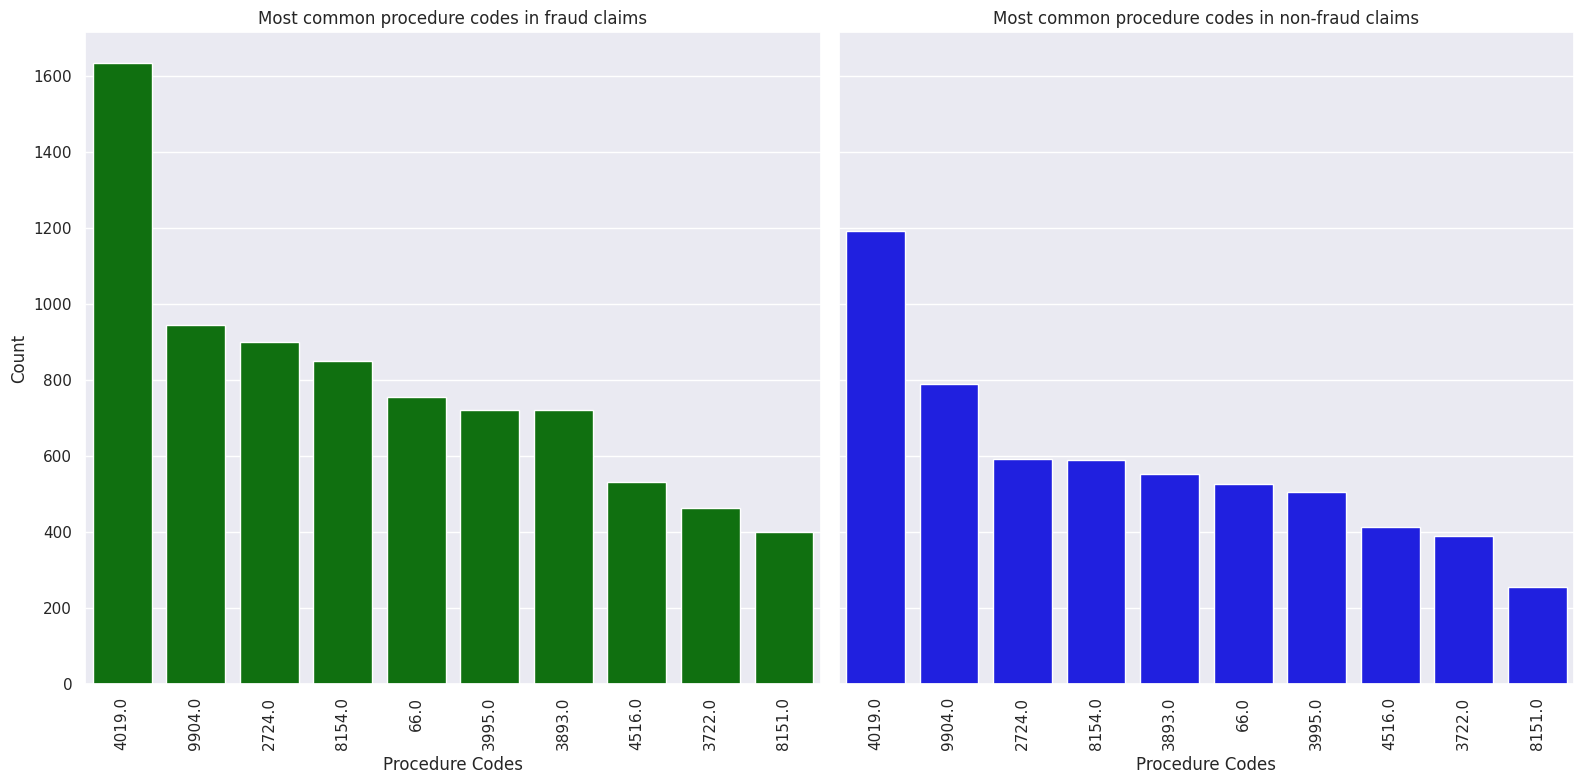

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of all procedure codes used for fraudulent claims
fraud_res = ins_data[ins_data.PotentialFraud == 1]
all_fraud_procedures = pd.DataFrame()
all_fraud_procedures['procedure_codes'] = pd.concat([fraud_res['ClmProcedureCode_1'], fraud_res['ClmProcedureCode_2'], fraud_res['ClmProcedureCode_3'],
                                                     fraud_res['ClmProcedureCode_4'], fraud_res['ClmProcedureCode_5'], fraud_res['ClmProcedureCode_6']],
                                                    axis=0).dropna()

# Get the top 10 most common procedure codes for fraudulent claims
top10_fraud = all_fraud_procedures['procedure_codes'].value_counts().reset_index(name='count').rename(columns={'index': 'procedure_codes'})[:10]

# List of all procedure codes used for non-fraudulent claims
nonfraud_res = ins_data[ins_data.PotentialFraud == 0]
all_nonfraud_procedures = pd.DataFrame()
all_nonfraud_procedures['procedure_codes'] = pd.concat([nonfraud_res['ClmProcedureCode_1'], nonfraud_res['ClmProcedureCode_2'], nonfraud_res['ClmProcedureCode_3'],
                                                        nonfraud_res['ClmProcedureCode_4'], nonfraud_res['ClmProcedureCode_5'], nonfraud_res['ClmProcedureCode_6']],
                                                       axis=0).dropna()

# Get the top 10 most common procedure codes for non-fraudulent claims
top10_nonfraud = all_nonfraud_procedures['procedure_codes'].value_counts().reset_index(name='count').rename(columns={'index': 'procedure_codes'})[:10]

# Plotting side by side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for fraudulent claims
sns.barplot(ax=axes[0], x='procedure_codes', y='count', data=top10_fraud, color='green',
            order=top10_fraud.sort_values('count', ascending=False)['procedure_codes'])
axes[0].set_title('Most common procedure codes in fraud claims')
axes[0].set_xlabel('Procedure Codes')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for non-fraudulent claims
sns.barplot(ax=axes[1], x='procedure_codes', y='count', data=top10_nonfraud, color='blue',
            order=top10_nonfraud.sort_values('count', ascending=False)['procedure_codes'])
axes[1].set_title('Most common procedure codes in non-fraud claims')
axes[1].set_xlabel('Procedure Codes')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


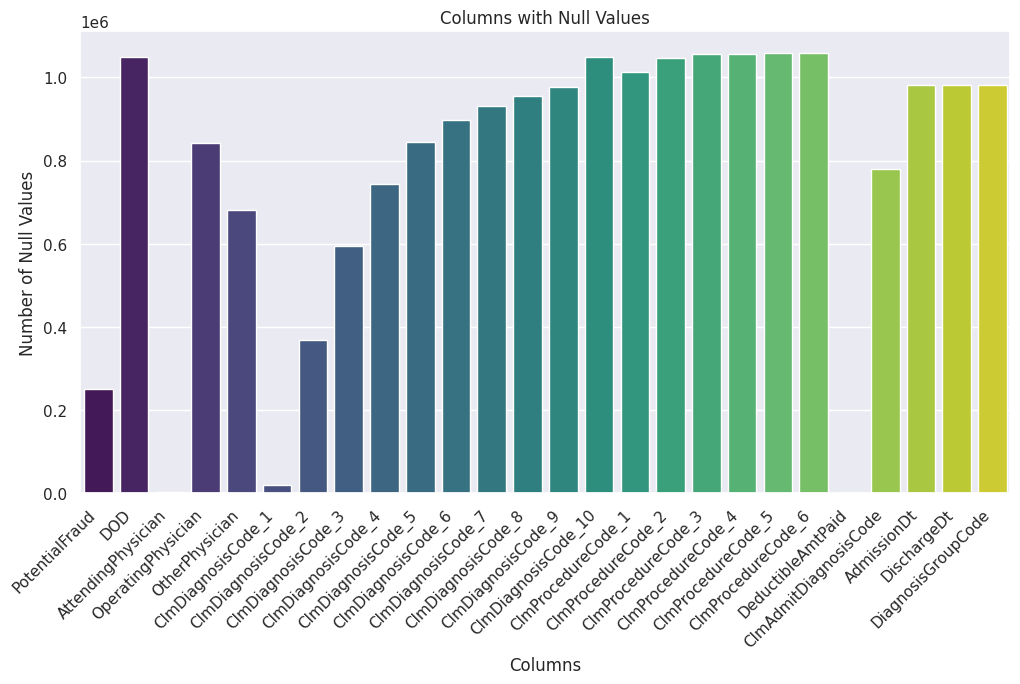

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ins_data is your DataFrame
null_counts = ins_data.isna().sum()



# Filtering columns with null values
columns_with_null = null_counts[null_counts > 0].index

# Creating a bar plot for columns with null values
plt.figure(figsize=(12, 6))
sns.barplot(x=columns_with_null, y=null_counts[columns_with_null], palette='viridis')
plt.title('Columns with Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.show()




# Analyzing Claim procedures and Claim Diagnosis Code null values






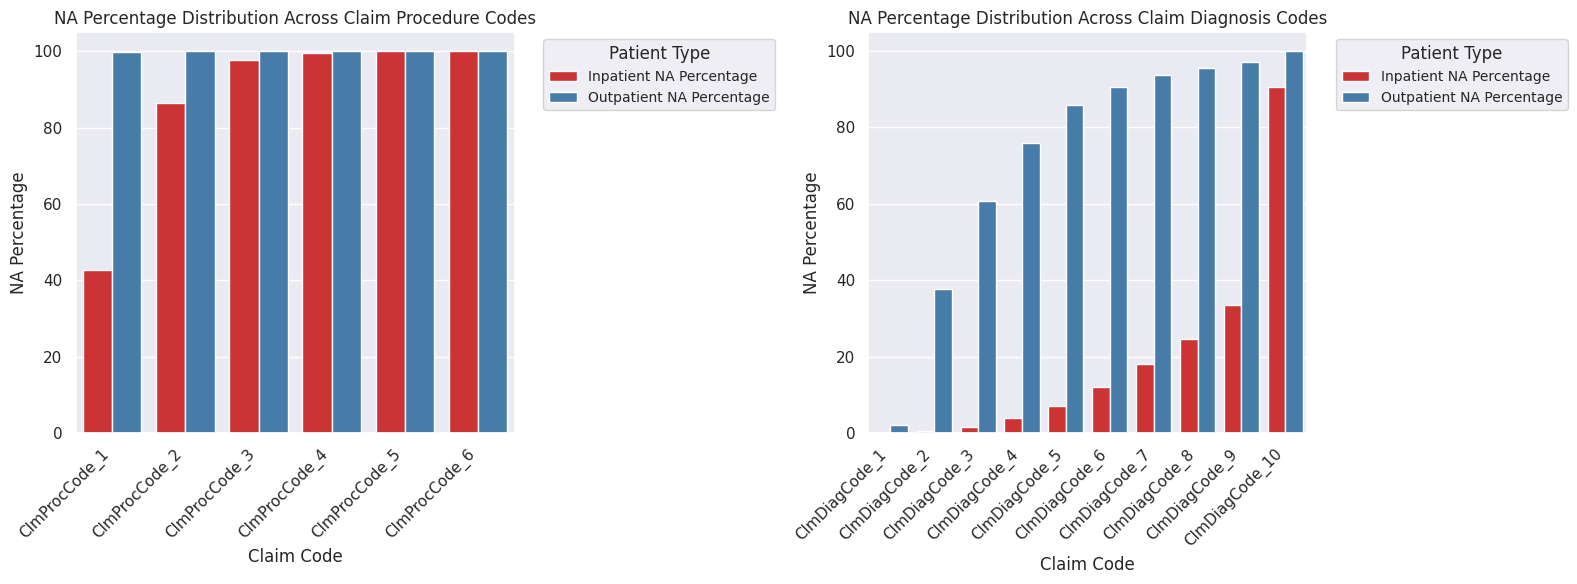

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df_inpatient and df_outpatient are your DataFrames

# Function to create a bar plot for missing values percentages
def plot_missing_values(ax, data, title):
    # Melt the DataFrame to long format for easier plotting
    data_melted = data.melt(id_vars='Claim Code', var_name='Dataset', value_name='NA Percentage')

    # Plot grouped bar plot
    # Plot grouped bar plot with Set1 color palette
    sns.barplot(data=data_melted, x='Claim Code', y='NA Percentage', hue='Dataset', palette='Set1', ax=ax)

    ax.set_title(title)
    ax.set_xlabel('Claim Code')
    ax.set_ylabel('NA Percentage')
    ax.legend(title='Patient Type', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# List of procedure codes
clm_proc = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

# Lists to store percentages of missing values for inpatient and outpatient datasets
clm_proc_inpatient = []
clm_proc_outpatient = []

# Calculate percentage of missing values for each procedure code in inpatient and outpatient datasets
for i in clm_proc:
    clm_proc_inpatient.append(np.round((df_inpatient[i].isna().sum() / len(df_inpatient[i])) * 100, 2))
    clm_proc_outpatient.append(np.round((df_outpatient[i].isna().sum() / len(df_outpatient[i])) * 100, 2))

# Create a DataFrame for easier plotting
for i in range(len(clm_proc)):
    clm_proc[i] = clm_proc[i].replace("Procedure", "Proc")

data_proc = pd.DataFrame({
    'Claim Code': clm_proc,
    'Inpatient NA Percentage': clm_proc_inpatient,
    'Outpatient NA Percentage': clm_proc_outpatient
})

# List of diagnosis codes
clm_diag = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

# Lists to store percentages of missing values for inpatient and outpatient datasets
clm_diag_inpatient = []
clm_diag_outpatient = []

# Calculate percentage of missing values for each diagnosis code in inpatient and outpatient datasets
for i in clm_diag:
    clm_diag_inpatient.append(np.round((df_inpatient[i].isna().sum() / len(df_inpatient[i])) * 100, 2))
    clm_diag_outpatient.append(np.round((df_outpatient[i].isna().sum() / len(df_outpatient[i])) * 100, 2))

# Create a DataFrame for easier plotting
for i in range(len(clm_diag)):
    clm_diag[i] = clm_diag[i].replace("Diagnosis", "Diag")

data_diag = pd.DataFrame({
    'Claim Code': clm_diag,
    'Inpatient NA Percentage': clm_diag_inpatient,
    'Outpatient NA Percentage': clm_diag_outpatient
})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for procedure codes
plot_missing_values(axes[0], data_proc, 'NA Percentage Distribution Across Claim Procedure Codes')

# Plot for diagnosis codes
plot_missing_values(axes[1], data_diag, 'NA Percentage Distribution Across Claim Diagnosis Codes')

plt.tight_layout()
plt.show()


1. We see that there are 100% NA values in the Outpatient dataset in all of the claim Procedure columns. This is because most of the outpatients do not undergo procedures.
2. In case of a need for a complex procedure, the patients are admitted and are treated as inpatients
3. High percenatge of the NA values in the merged datasets is not due to missing data but due to the reason that the size of the Outpatient dataset is much higher than the Inpatient dataset
4. As most of the outptient dataset claim procedure has a high values of NA, they are introducing skewness in the merged dataset.


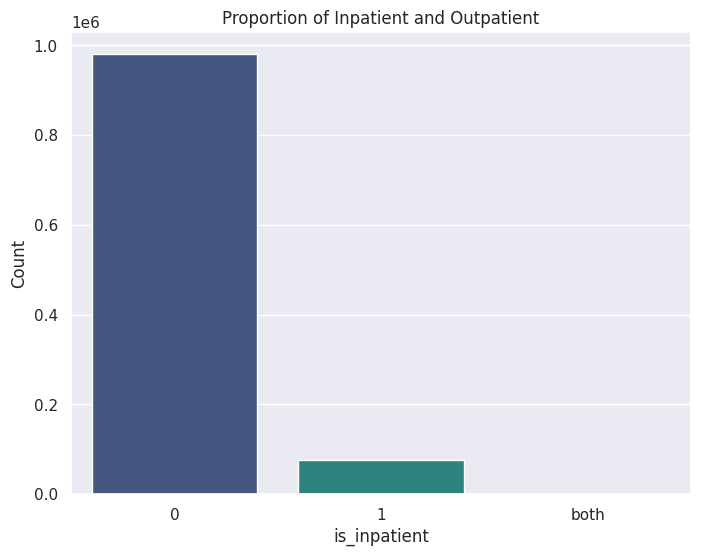

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ins_data is your DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x='is_inpatient', data=ins_data, palette='viridis')

plt.title('Proportion of Inpatient and Outpatient')
plt.xlabel('is_inpatient')
plt.ylabel('Count')
plt.show()


In [125]:
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0.0,BENE11727,1930-05-01,NaN,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaN,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaN,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaN,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0


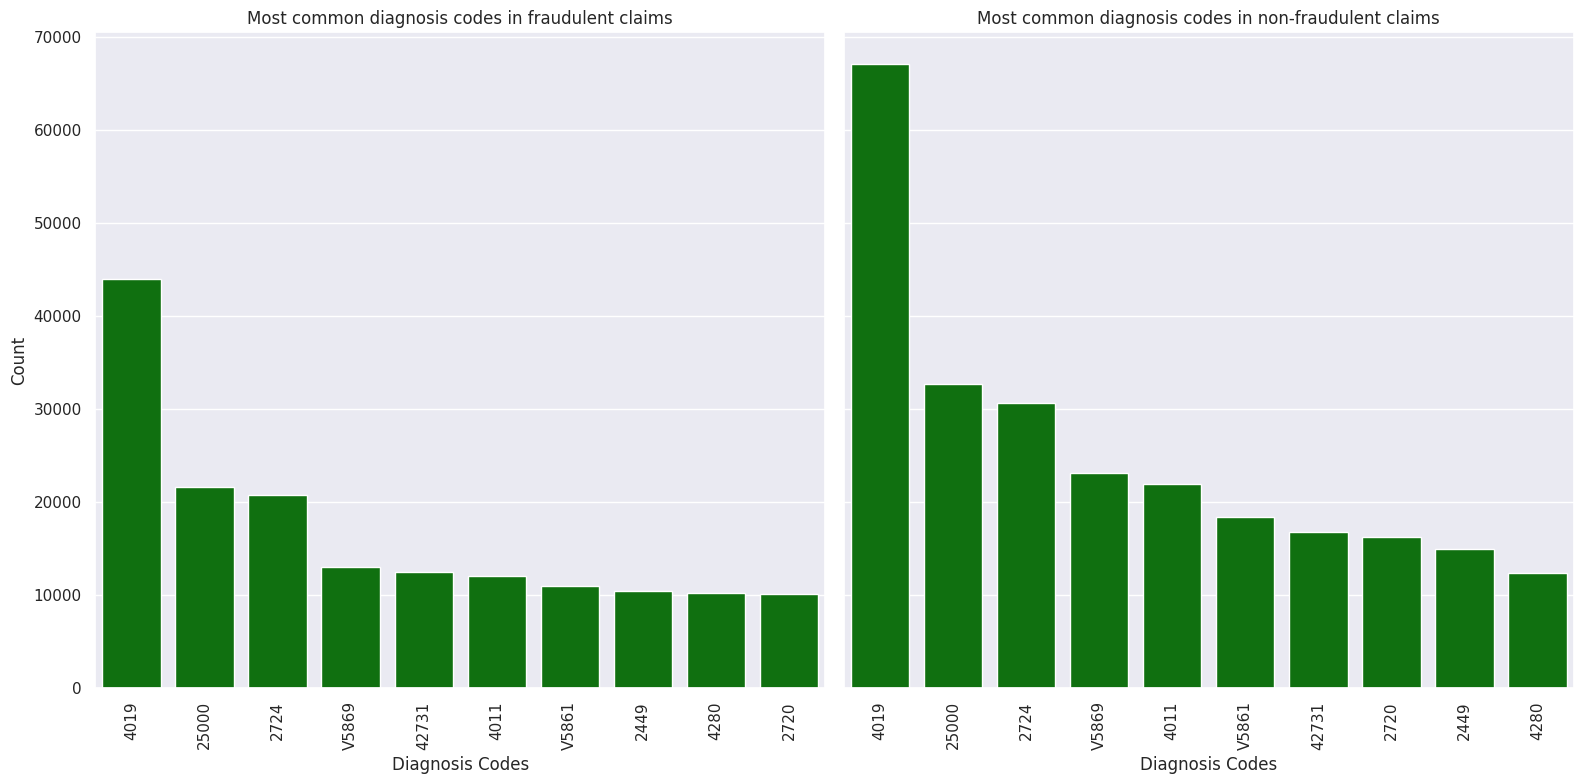

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of all procedure codes used for fraudulent claims
fraud_data = ins_data[ins_data.PotentialFraud == 1]
all_fraud_diagnosis = pd.DataFrame()
all_fraud_diagnosis['diagnosis_codes'] = pd.concat([fraud_data[f'ClmDiagnosisCode_{i}'] for i in range(1, 11)], axis=0).dropna()

# Top 10 most common diagnosis codes for fraudulent claims
top10_fraud = all_fraud_diagnosis['diagnosis_codes'].value_counts().reset_index(name='count').rename(columns={'index': 'diagnosis_codes'})[:10]

# List of all procedure codes used for non-fraudulent claims
nonfraud_data = ins_data[ins_data.PotentialFraud == 0]
all_nonfraud_diagnosis = pd.DataFrame()
all_nonfraud_diagnosis['diagnosis_codes'] = pd.concat([nonfraud_data[f'ClmDiagnosisCode_{i}'] for i in range(1, 11)], axis=0).dropna()

# Top 10 most common diagnosis codes for non-fraudulent claims
top10_nonfraud = all_nonfraud_diagnosis['diagnosis_codes'].value_counts().reset_index(name='count').rename(columns={'index': 'diagnosis_codes'})[:10]

# Plotting side by side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for fraudulent claims
sns.barplot(ax=axes[0], x='diagnosis_codes', y='count', data=top10_fraud, color='green',
            order=top10_fraud.sort_values('count', ascending=False)['diagnosis_codes'])
axes[0].set_title('Most common diagnosis codes in fraudulent claims')
axes[0].set_xlabel('Diagnosis Codes')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for non-fraudulent claims
sns.barplot(ax=axes[1], x='diagnosis_codes', y='count', data=top10_nonfraud, color='green',
            order=top10_nonfraud.sort_values('count', ascending=False)['diagnosis_codes'])
axes[1].set_title('Most common diagnosis codes in non-fraudulent claims')
axes[1].set_xlabel('Diagnosis Codes')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [127]:
ins_data.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimID',
       'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
  

In [128]:
# Dropping Claim diagnosis codes and Procedure codes
ins_data.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'], axis=1, inplace=True)
print("Droped claim diagnosis codes and procedure codes successfully.")

Droped claim diagnosis codes and procedure codes successfully.


**Observations**
- Outpatient Data has 100% NA values.
This indicates that outpatients do not go for claim procedures
And it also indicates that the fraud providers must have flasely claimed most of the outpatient to be inpatient so as to charge

- For cases needing claim procedures,the patients are admitted and tagged as inpatients


**DOB and DOD column won't add any additional value to predict the target variable and also we have calculated Age and is_dead columns with these, so we can get rid of them.**

In [129]:
ins_data['DOB'] = pd.to_datetime(ins_data['DOB'])
ins_data['DOD'] = pd.to_datetime(ins_data['DOD'])
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,78902,NaN,NaN,NaN,0


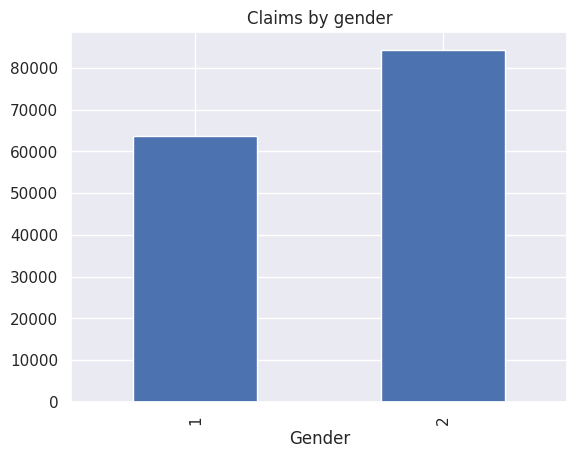

In [130]:


# Value count of gender column
ins_data.groupby('Gender')['BeneID'].nunique().plot.bar()
plt.title("Claims by gender")
plt.show()

More no. of claims are made for men, as more men get ill every year.



In [131]:
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,2,2,2,2,2,1,1,1,2,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,2,2,1,2,2,2,1,1,2,1,2,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,2,2,2,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,78902,NaN,NaN,NaN,0


# Data Preprocessing

In [132]:
#replacing categorical columns with binary valuea
ins_data.RenalDiseaseIndicator.replace({'0':0, 'Y':1}, inplace=True)

#Replacing 2 with 0 for all chronic conditions for
ins_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0, inplace=True)

In [133]:
ins_data.head(5)

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,NaN,NaN,NaN,NaN,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,NaN,NaN,NaN,NaN,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaN,NaN,NaN,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,78902,NaN,NaN,NaN,0


In [134]:
#Changing data type of ClaimStartDt and ClaimEndDt to datetime
ins_data['ClaimStartDt'] = pd.to_datetime(ins_data['ClaimStartDt'])
ins_data['ClaimEndDt'] = pd.to_datetime(ins_data['ClaimEndDt'])

# Changing data type of AdmissionDt and DischargeDt to datetime
ins_data['AdmissionDt'] = pd.to_datetime(ins_data['AdmissionDt'])
ins_data['DischargeDt'] = pd.to_datetime(ins_data['DischargeDt'])

In [135]:
ins_data['is_deductible'] = ins_data['DeductibleAmtPaid'].apply(lambda x: 0 if pd.isnull(x) else 1)
ins_data['is_deductible'].value_counts()

is_deductible
1    1055629
0       1787
Name: count, dtype: int64

**IS_DEAD**

In [136]:
ins_data['is_dead'] = ins_data['DOD'].apply(lambda x: 0 if pd.isnull(x) else 1)
ins_data['is_dead'].value_counts()

is_dead
0    1050029
1       7387
Name: count, dtype: int64

In [137]:
# Extract year from all non-null values in DOD column
dod_year = ins_data['DOD'].dt.year
dod_year[pd.notnull(dod_year)].value_counts()

DOD
2009.0    7387
Name: count, dtype: int64

In [138]:
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient,is_deductible,is_dead
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,NaN,NaT,NaT,NaN,0,1,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,NaN,NaT,NaT,NaN,0,1,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaT,NaT,NaN,0,1,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,59970,NaT,NaT,NaN,0,1,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,78902,NaT,NaT,NaN,0,1,0


**Adding  new features**

**AGE**

**This** Data is from 2009 mostly

In [139]:
# Extract year from all non-null values in ClaimStartDt
start_year = ins_data['ClaimStartDt'].dt.year
print("Frequency of year from ClaimStartDt column: ")
print(start_year[pd.notnull(start_year)].value_counts())
print()
# Extract year from all non-null values in ClaimEndDt
end_year = ins_data['ClaimEndDt'].dt.year
print("Frequency of year from ClaimEndDt column: ")
print(end_year[pd.notnull(end_year)].value_counts())

Frequency of year from ClaimStartDt column: 
ClaimStartDt
2009    1052000
2008       5416
Name: count, dtype: int64

Frequency of year from ClaimEndDt column: 
ClaimEndDt
2009    1057414
2008          2
Name: count, dtype: int64


**Since all the non-null DOD values are from the year 2009 and most of the claims have been made in the year 2009, it is safe to assume that this data is from the year 2009 and to calculate age we can subtract 2009 with DOB value.**

In [140]:
cols = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure',
        'ChronicCond_KidneyDisease','ChronicCond_Cancer',
        'ChronicCond_ObstrPulmonary','ChronicCond_Depression',
        'ChronicCond_Diabetes','ChronicCond_IschemicHeart',
        'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

ins_data['Diseases_Count'] = ins_data[cols].sum(axis=1)
ins_data[cols+['Diseases_Count']].head()

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Diseases_Count
0,1,1,1,1,0,0,1,1,0,0,0,6
1,1,0,0,0,0,0,1,1,1,0,1,5
2,0,0,1,0,0,0,1,1,0,1,0,4
3,0,0,1,0,0,0,1,1,0,1,0,4
4,1,1,1,1,1,1,1,1,0,0,0,8


In [141]:
#replacing NA values with 0
ins_data['DeductibleAmtPaid'] = ins_data['DeductibleAmtPaid'].fillna(0)

In [142]:
# Generating a  new column dead  to indicate if the beneficiary was dead when the claim was made
ins_data['dead'] = ins_data['DOD'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [143]:
#generating a column age of beneficiary

# Extract year from all non-null values in DOD column
dod_year = ins_data['DOD'].dt.year
dod_year[pd.notnull(dod_year)].value_counts()

DOD
2009.0    7387
Name: count, dtype: int64

In [144]:
ins_data['Age'] = 2009 - ins_data['DOB'].dt.year
ins_data['Age'].head()

0    79
1    66
2    76
3    76
4    73
Name: Age, dtype: int64

In [145]:
start_year = ins_data['ClaimStartDt'].dt.year
start_year[pd.notnull(start_year)].value_counts()

ClaimStartDt
2009    1052000
2008       5416
Name: count, dtype: int64

In [146]:
end_year = ins_data['ClaimEndDt'].dt.year
end_year[pd.notnull(end_year)].value_counts()

ClaimEndDt
2009    1057414
2008          2
Name: count, dtype: int64


Given that all non-null Date of Death (DOD) values correspond to the year 2009, alongside the majority of claims being made within the same year, it is reasonable to infer that this dataset pertains to the year 2009. Consequently, to derive the age of individuals, we can subtract their date of birth (DOB) from 2009.

In [147]:
ins_data['age']=2009-dod_year

In [148]:
ins_data.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimID',
       'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode', 'is_inpatient', 'is_deductible',
       'is_dead', 'Diseases_Count', 'dead', 'Age', 'age'],
      dtype='obje

**DAYS_ADMITTED**


In [149]:
ins_data['Days_Admitted'] = (ins_data['DischargeDt'] - ins_data['AdmissionDt']).fillna(pd.Timedelta('0')).apply(lambda x: int(str(x).split()[0]))
ins_data[['ClaimStartDt', 'ClaimEndDt', 'Days_Admitted']].head()

,ClaimStartDt,ClaimEndDt,Days_Admitted
0,2009-12-17,2009-12-17,0
1,2009-05-22,2009-05-23,0
2,2009-12-28,2009-12-28,0
3,2009-12-28,2009-12-28,0
4,2009-03-29,2009-03-30,0


**CLAIM_PERIOD**

In [150]:
#calculating claim period
ins_data['Claim_Period'] = (ins_data['ClaimEndDt'] - ins_data['ClaimStartDt']).fillna(pd.Timedelta('0 days'))
ins_data['Claim_Period'] = ins_data['Claim_Period'].apply(lambda x: int(str(x).split()[0]))

**CLIAMPERIOD_GREATER_DAYSADMITTED**

Checking for records where claim period is greater than the admitted days of a beneficiary

In [151]:
ins_data['ClaimPeriod_greater_DaysAdmitted'] = (ins_data.Claim_Period > ins_data.Days_Admitted).replace({True:1, False:0})
ins_data['ClaimPeriod_greater_DaysAdmitted'].value_counts()

ClaimPeriod_greater_DaysAdmitted
0    933069
1    124347
Name: count, dtype: int64

**DROPPED 'AdmissionDt', 'DischargeDt'**

In [152]:
ins_data.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)
print("Dropped AdmissionDt and DischargeDt successfully.")

Dropped AdmissionDt and DischargeDt successfully.


In [153]:
ins_data['is_claimcode'] = ins_data['ClmAdmitDiagnosisCode'].apply(lambda x: 0 if pd.isnull(x) else 1)
ins_data['is_claimcode'].value_counts()

is_claimcode
0    779352
1    278064
Name: count, dtype: int64

In [154]:
ins_data['is_groupcode'] = ins_data['DiagnosisGroupCode'].apply(lambda x: 0 if pd.isnull(x) else 1)
ins_data['is_groupcode'].value_counts()

is_groupcode
0    980589
1     76827
Name: count, dtype: int64

Since most of the values in ClmAdmitDiagnosisCode and DiagnosisGroupCode are empty, and we have already added a flag column to indicate the presence of missing values we can get rid of these columns.

In [155]:
ins_data.drop(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode'], axis=1, inplace=True)
print("Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.")

Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.


In [156]:
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,is_inpatient,is_deductible,is_dead,Diseases_Count,dead,Age,age,Days_Admitted,Claim_Period,ClaimPeriod_greater_DaysAdmitted,is_claimcode,is_groupcode
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,0,1,0,6,0,79,NaN,0,0,0,0,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,0,1,0,5,0,66,NaN,0,1,1,0,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,0,1,0,4,0,76,NaN,0,0,0,1,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,0,1,0,4,0,76,NaN,0,0,0,1,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,0,1,0,8,0,73,NaN,0,1,1,1,0


# EDA

In [157]:
data_clean = ins_data.drop(['DOB', 'DOD'], axis=1).copy()
print("Dropped DOB and DOD successfully.")
print("Dropped DOB and DOD succesfully.")

Dropped DOB and DOD successfully.
Dropped DOB and DOD succesfully.


In [158]:
data_clean['is_deductible'].value_counts()

is_deductible
1    1055629
0       1787
Name: count, dtype: int64

**1.1 What proportion of inpatient claims and outpatient claims were fraudulent?**

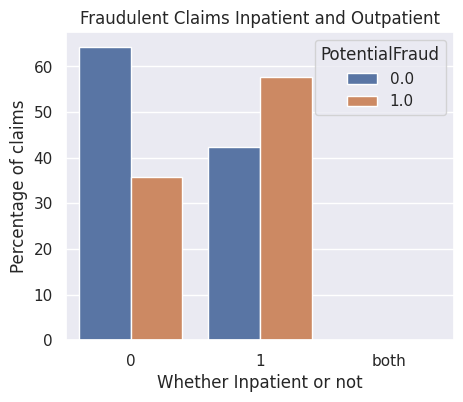

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'is_inpatient' and 'PotentialFraud', then count 'ClaimID'
res = data_clean.groupby(['is_inpatient', 'PotentialFraud']).ClaimID.count().reset_index()

# Calculate the proportion of claims
res['Proportion'] = res.groupby('is_inpatient')['ClaimID'].transform(lambda x: 100 * x / x.sum())

# Set the theme and create the plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5, 4))
ax = sns.barplot(x='is_inpatient', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims Inpatient and Outpatient')
plt.xlabel('Whether Inpatient or not')
plt.ylabel('Percentage of claims')
plt.show()


In [160]:
data_clean['is_inpatient'] = pd.to_numeric(data_clean['is_inpatient'], errors='coerce')
data_clean['is_inpatient'].value_counts()


is_inpatient
0    980589
1     76827
Name: count, dtype: int64

**1.2 No. of inpatient claims for fraud providers and non fraud providers**


Text(0, 0.5, 'No. of inpatient claims')

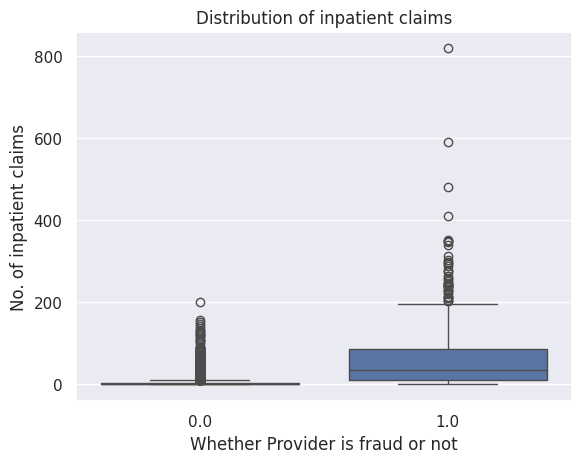

In [161]:
res1 = data_clean.groupby('Provider').is_inpatient.sum()\
                    .reset_index().rename(columns={'is_inpatient':'InpatientClaim_Count'})
res2 = ins_data[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')
res3 = res1.merge(res2, on='Provider', how='inner')
sns.boxplot(x='PotentialFraud', y='InpatientClaim_Count', data=res3)
plt.title('Distribution of inpatient claims')
plt.xlabel('Whether Provider is fraud or not')
plt.ylabel('No. of inpatient claims')

**1.3 No. of fraudulent claims from each race**


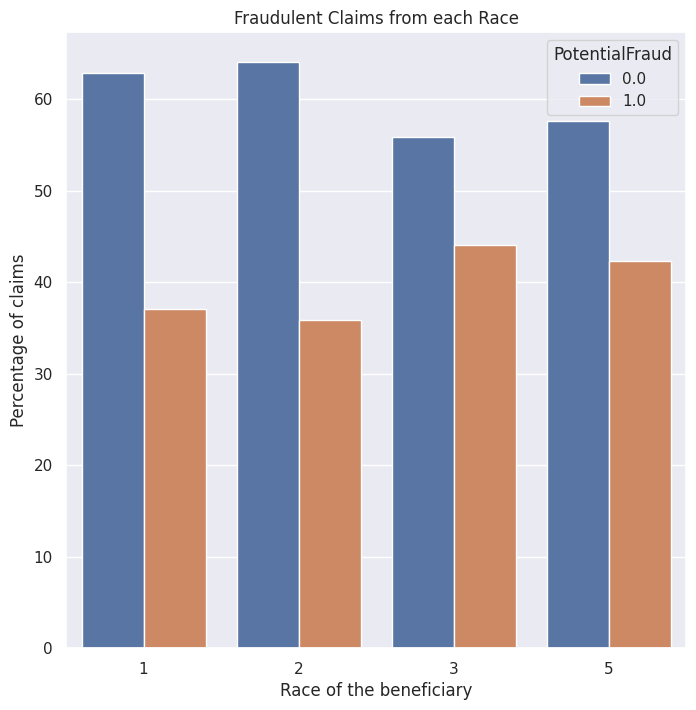

37.08150858379828% of claims for Race 1 are fraudulent
35.87425164453423% of claims for Race 2 are fraudulent
44.124144811858606% of claims for Race 3 are fraudulent
42.3328888631225% of claims for Race 5 are fraudulent


In [162]:
# Group by 'Race' and 'PotentialFraud', then count 'ClaimID'
res = data_clean.groupby(['Race', 'PotentialFraud']).ClaimID.count().reset_index()

# Calculate the proportion of claims
res['Proportion'] = res.groupby('Race')['ClaimID'].transform(lambda x: 100 * x / x.sum())

# Set the theme and create the plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='Race', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Race')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

# Print the percentage of fraudulent claims for each race
for race in res['Race'].unique():
    print("{}% of claims for Race {} are fraudulent"
          .format(res[(res.Race == race) & (res.PotentialFraud == 1)].Proportion.values[0], race))


In [163]:
data_clean.drop(['Race'], axis=1, inplace=True)
print("Dropped Race column succesfully.")

Dropped Race column succesfully.


**1.4 Proportion of fraudulent claims in each State**


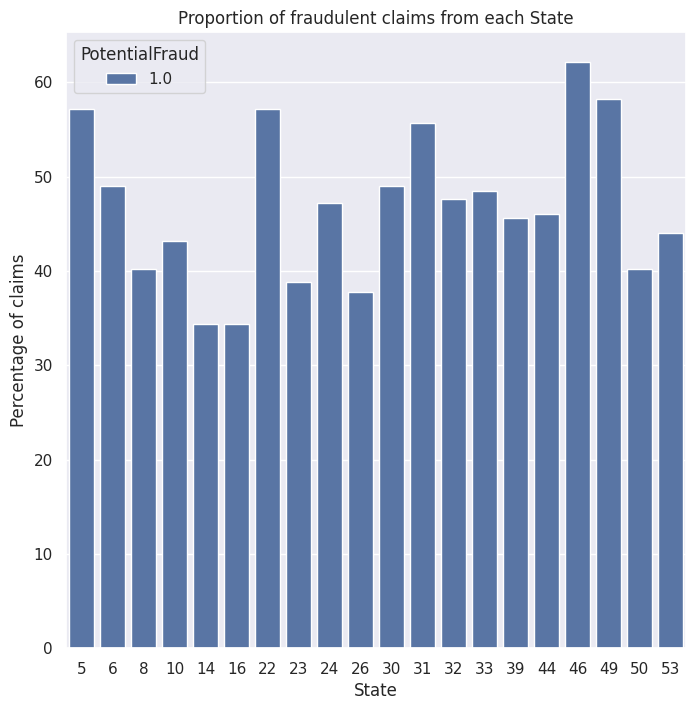

Total no. of states 104


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'State' and 'PotentialFraud', then count 'ClaimID'
res = data_clean.groupby(['State', 'PotentialFraud']).ClaimID.count()

# Calculate the proportion of claims
res = res.groupby(level=0).transform(lambda x: 100 * x / x.sum()).reset_index(name='Proportion')

# Plot the proportions
plt.figure(figsize=(8, 8))
ax = sns.barplot(x='State', y='Proportion', hue='PotentialFraud', data=res[res.PotentialFraud == 1].sort_values(by='Proportion', ascending=False).head(20))
plt.title('Proportion of fraudulent claims from each State')
plt.xlabel('State')
plt.ylabel('Percentage of claims')
plt.show()

print("Total no. of states", len(res))



**Observations**
Out of 52 states only 5 states have proportion of fraudulent claims more that 50%.
State is not an important factor in predicting if a claim is fraudulent or not.

```
```



In [165]:
data_clean['is_deductible'].value_counts()

is_deductible
1    1055629
0       1787
Name: count, dtype: int64

In [166]:
# Dropping State column
data_clean.drop(['State'], axis=1, inplace=True)
print("Dropped State column successfully.")

Dropped State column successfully.


In [167]:
ins_data.head()

,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,is_inpatient,is_deductible,is_dead,Diseases_Count,dead,Age,age,Days_Admitted,Claim_Period,ClaimPeriod_greater_DaysAdmitted,is_claimcode,is_groupcode
0,PRV51001,0.0,BENE11727,1930-05-01,NaT,1,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,0.0,0,1,0,6,0,79,NaN,0,0,0,0,0
1,PRV51001,0.0,BENE24646,1943-03-01,NaT,1,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,0.0,0,1,0,5,0,66,NaN,0,1,1,0,0
2,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,0,1,0,4,0,76,NaN,0,0,0,1,0
3,PRV51001,0.0,BENE31617,1933-08-01,NaT,2,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,0.0,0,1,0,4,0,76,NaN,0,0,0,1,0
4,PRV51001,0.0,BENE32715,1936-03-01,NaT,1,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,0.0,0,1,0,8,0,73,NaN,0,1,1,1,0


In [168]:
data_clean.drop(['County'], axis=1, inplace=True)

Neither procedure codes nor diagnosis codes add any value to predict fraudulent claims and detect fraudulent providers. As they have a lot of missing values too, we can get rid of them.

Since most of the values in ClmAdmitDiagnosisCode and DiagnosisGroupCode are empty we can drop them

Since outpatient claims don't have any AdmissionDt and DischargeDt and we have already calculated a new feature Days_Admitted that stores the no. of days a patient was admitted in a hospital, we can get rid of them.

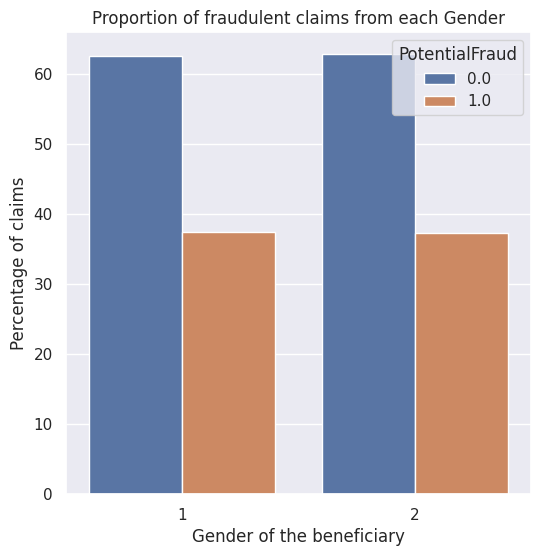

Total number of genders: 4


In [169]:



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Gender' and 'PotentialFraud', then count 'ClaimID'
res = data_clean.groupby(['Gender', 'PotentialFraud']).ClaimID.count()

# Calculate the proportion of claims
res = res.groupby(level=0).transform(lambda x: 100 * x / x.sum()).reset_index(name='Proportion')

# Plot the proportions
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Gender', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Proportion of fraudulent claims from each Gender')
plt.xlabel('Gender of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

# Print the total number of genders
print("Total number of genders:", len(res))



The proportion of fraudulent claims in each gender group is almost the same.
Gender's no role to play in identifying fraud claims, we can get rid of it.

In [170]:

# Dropping Gender column
data_clean.drop(['Gender'], axis=1, inplace=True)
print("Dropped Gender column successfully")

Dropped Gender column successfully


In [171]:
data_clean.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'RenalDiseaseIndicator',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimID',
       'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'DeductibleAmtPaid', 'is_inpatient', 'is_deductible', 'is_dead',
       'Diseases_Count', 'dead', 'Age', 'age', 'Days_Admitted', 'Claim_Period',
       'ClaimPeriod_greater_DaysAdmitted', 'is_claimcode', 'is_groupcode'],
      dtype='object')

In [172]:
output_train = data_clean[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')

data_clean['is_inpatient'] = pd.to_numeric(data_clean['is_inpatient'], errors='coerce')


data_clean['is_inpatient'] = pd.to_numeric(data_clean['is_inpatient'], errors='coerce')
data_clean['is_inpatient'].fillna(0, inplace=True)


# Grouping columns with aggregation=count on Provider column
bene_count = data_clean.groupby('Provider').BeneID.nunique().reset_index().rename(columns={'BeneID':'Beneficiaries_Count'})
claim_count = data_clean.groupby('Provider').ClaimID.nunique().reset_index().rename(columns={'ClaimID':'Claims_Count'})
agg_count_data = bene_count.merge(claim_count, on='Provider', how='inner')

# Grouping columns with aggregation=sum on Provider column
agg_sum_data = data_clean.groupby('Provider')[['RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'is_inpatient', 'is_dead','is_claimcode','is_groupcode',
        'is_deductible', 'ClaimPeriod_greater_DaysAdmitted']].sum().reset_index()

# Grouping columns with aggregate=mean on Provider column
agg_mean_data = data_clean.groupby('Provider')[['IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Age', 'Days_Admitted',
       'Diseases_Count',
       'Claim_Period']].mean().reset_index()

# Merging all aggregated groups and target column
train_grouped = agg_count_data.merge(agg_sum_data, on='Provider', how='inner')\
                         .merge(agg_mean_data, on='Provider', how='inner')\
                         .merge(output_train, on='Provider', how='inner')
print("Shape: ", train_grouped.shape)


Shape:  (6763, 32)


Text(0, 0.5, 'Avg no. of beneficiaries')

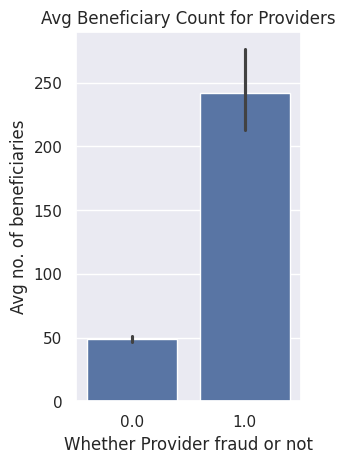

In [173]:
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Beneficiaries_Count', data=train_grouped)
plt.title("Avg Beneficiary Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of beneficiaries")

If the Beneficiary Count of a provider is greater than 50, it is very likely he/she is a fraud.

Text(0, 0.5, 'Avg no. of claims')

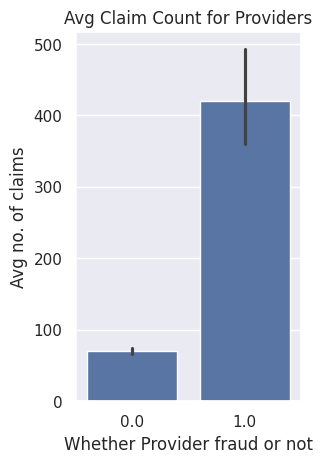

In [174]:
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Claims_Count', data=train_grouped)
plt.title("Avg Claim Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claims")

If a provider has filed more than 100 claims, it is highly likely that he/she is a fraud.


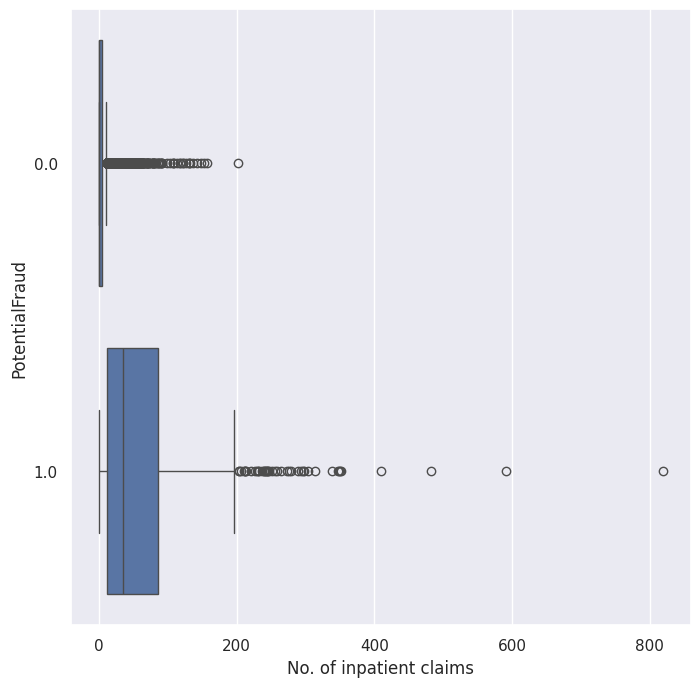

In [175]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_inpatient', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of inpatient claims")
plt.show()

- It is very clear from the plot that fraudulent providers make significantly more inpatient claims tham genuine providers.
- From our previous analysis, we had found that 58% of inpatient claims were fraudulent.
- It is very likely that fraudulent providers make fake claims for beneficiaries who were never given any hospital treatment.
- If majority of claims filed by a provider are for inpatients than it is likely that the provider is fraudulent.

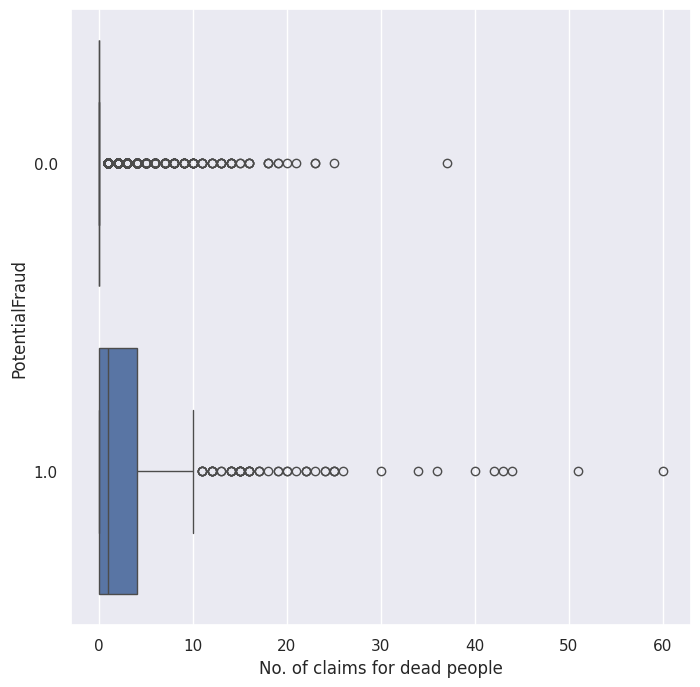

In [176]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_dead', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of claims for dead people")
plt.show()

**Preparing Data for Modelling**

In [177]:
train_grouped.head()

,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Claim_Period,PotentialFraud
0,PRV51001,24,25,12,20,26,26,8,15,14,30,33,7,11,9,8,0,18,8,36,4,19024.444444,860.333333,2528.333333,531.611111,4447.500000,237.333333,77.277778,0.861111,5.527778,1.194444,0.0
1,PRV51002,169,205,63,154,211,142,50,127,178,290,295,118,106,38,0,5,84,0,396,49,5364.090909,567.636364,2417.979798,695.909091,265.757576,1.919192,71.974747,0.000000,4.315657,1.012626,NaN
2,PRV51003,117,132,52,96,134,108,13,68,89,165,183,47,66,21,97,2,124,97,212,21,7934.622642,949.264151,3108.915094,864.622642,4551.084906,489.320755,69.919811,2.386792,4.669811,3.816038,1.0
3,PRV51004,138,149,36,100,140,83,27,64,101,164,166,81,74,25,0,2,41,0,228,30,5032.587719,512.280702,2250.394737,644.254386,353.728070,2.412281,72.087719,0.000000,4.495614,1.197368,0.0
4,PRV51005,495,1165,336,580,923,690,238,385,637,1080,1189,466,441,164,0,5,322,0,1545,162,4026.368932,422.115210,2235.961165,645.066667,244.569579,3.139159,70.014887,0.000000,4.396764,1.071197,1.0


- Almost all claims filed for dead patients were made by fraudulent providers.
- If a provider makes high no. of claims for dead people, it is likely that he/she is a fraud.

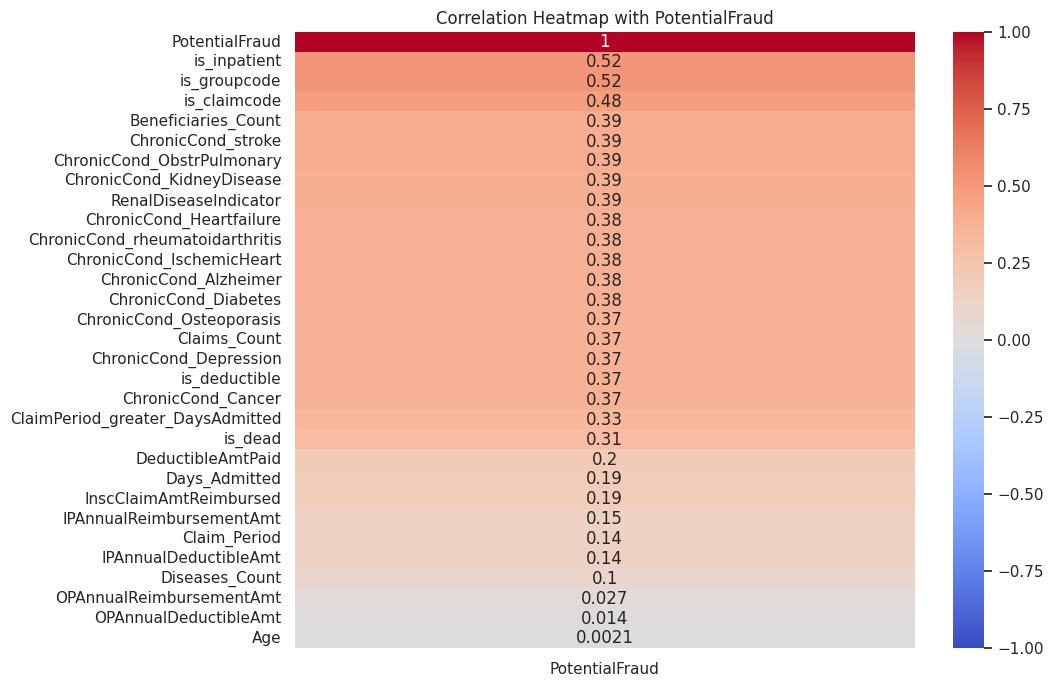

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_grouped is your DataFrame and 'PotentialFraud' is the column of interest

# Calculate correlation matrix
correlation_matrix = train_grouped.drop("Provider", axis=1).corr()

# Sort correlation values with 'PotentialFraud'
correlation_sorted = correlation_matrix['PotentialFraud'].sort_values(ascending=False).to_frame()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with PotentialFraud')
plt.show()


**Correlation of features in final data with target variable**
1.   List item
2.   List item



**Evaluation Metrics
Since the cost of mis-classification is high and we can't afford to have:

High False Negatives: Fraudulent provider mis-classified as genuine provider i.e low recall
High False Positives: Genuine provider mis-classified as fraudulent provider i.e low precision
However, our primary objective is to have less no. of false negatives even if it means having slightly high false positives as not detecting a fraudulent provider can cause huge losses to insurance companies which in long term would make healthcare more expensive.
We can use Recall, F1 score and AUC score as evaluation metrics.**

In [179]:
from sklearn.model_selection import train_test_split

X = train_grouped.drop(['Provider','PotentialFraud'], axis=1)
Y = train_grouped[['PotentialFraud']]
Y = np.nan_to_num(Y,nan = 0)


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=10)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (5410, 30)
Shape of test data:  (1353, 30)


In [181]:
train_grouped.head()

,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Claim_Period,PotentialFraud
0,PRV51001,24,25,12,20,26,26,8,15,14,30,33,7,11,9,8,0,18,8,36,4,19024.444444,860.333333,2528.333333,531.611111,4447.500000,237.333333,77.277778,0.861111,5.527778,1.194444,0.0
1,PRV51002,169,205,63,154,211,142,50,127,178,290,295,118,106,38,0,5,84,0,396,49,5364.090909,567.636364,2417.979798,695.909091,265.757576,1.919192,71.974747,0.000000,4.315657,1.012626,NaN
2,PRV51003,117,132,52,96,134,108,13,68,89,165,183,47,66,21,97,2,124,97,212,21,7934.622642,949.264151,3108.915094,864.622642,4551.084906,489.320755,69.919811,2.386792,4.669811,3.816038,1.0
3,PRV51004,138,149,36,100,140,83,27,64,101,164,166,81,74,25,0,2,41,0,228,30,5032.587719,512.280702,2250.394737,644.254386,353.728070,2.412281,72.087719,0.000000,4.495614,1.197368,0.0
4,PRV51005,495,1165,336,580,923,690,238,385,637,1080,1189,466,441,164,0,5,322,0,1545,162,4026.368932,422.115210,2235.961165,645.066667,244.569579,3.139159,70.014887,0.000000,4.396764,1.071197,1.0


**Random Forest Model**


In [182]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [183]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

In [184]:
clf.score(X_test,y_test)

0.926829268292683

In [185]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("accuracy_score train set        : ", accuracy_score(y_train, y_train_pred))
print("accuracy_score test set        : ", accuracy_score(y_test, y_test_pred))
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))
print("confusion+matrix test set  : " ,"\n",confusion_matrix(y_test, y_test_pred) )


F1 score of train set        :  0.15964523281596452
accuracy_score train set        :  0.9299445471349354
accuracy_score test set        :  0.926829268292683
F1 score of train set        :  0.15964523281596452
F1 score of test set         :  0.09174311926605504
AUC score of train set       :  0.9188270988270988
AUC score of test set        :  0.9039872837123968
Precision score of train set :  0.782608695652174
Precision score of test  set :  0.625
Recall score of train set    :  0.08888888888888889
Recall score of test set     :  0.04950495049504951
confusion+matrix test set  :  
 [[1249    3]
 [  96    5]]


**SVM**

In [186]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [187]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)
y_train_prob = svm_clf.predict_proba(X_train)
y_test_prob = svm_clf.predict_proba(X_test)

In [188]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("accuracy_score train set        : ", accuracy_score(y_train, y_train_pred))
print("accuracy_score test set        : ", accuracy_score(y_test, y_test_pred))
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))
print("confusion matrix test set  : " ,"\n",confusion_matrix(y_test, y_test_pred) )


F1 score of train set        :  0.3933209647495362
accuracy_score train set        :  0.9395563770794825
accuracy_score test set        :  0.9386548410938654
F1 score of train set        :  0.3933209647495362
F1 score of test set         :  0.35658914728682173
AUC score of train set       :  0.8958705492038824
AUC score of test set        :  0.8300382753930344
Precision score of train set :  0.7910447761194029
Precision score of test  set :  0.8214285714285714
Recall score of train set    :  0.2617283950617284
Recall score of test set     :  0.22772277227722773
confusion matrix test set  :  
 [[1247    5]
 [  78   23]]


**Logistic Regression**

In [189]:
from sklearn.linear_model import LogisticRegression
log_clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [190]:
y_train_pred = log_clf.predict(X_train)
y_test_pred = log_clf.predict(X_test)
y_train_prob = log_clf.predict_proba(X_train)
y_test_prob = log_clf.predict_proba(X_test)

In [191]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("accuracy_score train set        : ", accuracy_score(y_train, y_train_pred))
print("accuracy_score test set        : ", accuracy_score(y_test, y_test_pred))
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))
print("confusion matrix test set  : " ,"\n",confusion_matrix(y_test, y_test_pred) )


F1 score of train set        :  0.4186851211072664
accuracy_score train set        :  0.9378927911275415
accuracy_score test set        :  0.9423503325942351
F1 score of train set        :  0.4186851211072664
F1 score of test set         :  0.48684210526315785
AUC score of train set       :  0.9188238921572255
AUC score of test set        :  0.9046911080884447
Precision score of train set :  0.6994219653179191
Precision score of test  set :  0.7254901960784313
Recall score of train set    :  0.29876543209876544
Recall score of test set     :  0.36633663366336633
confusion matrix test set  :  
 [[1238   14]
 [  64   37]]


7. Conclusion
The final data for training set is ready and we can do our modelling on it. In real world, to find fraudulent providers from a list of providers, we will have to do similar pre-processing and feature engineering on the test set containg details about Provider, inpatient claims, outpatient claims and beneficiary details before passing the data to the best model found in training phase.
The first cut models are performing decently if we consider AUC metric, but are not performing well if we consider F1 score probably because the dataset is highly imbalanced(90:10) and AUC metric tends to avg out FPR and TPR based on multiple probability thresholds.
We'll have to deal with data imbalance by techniques like SMOTE, Over-Sampling, Under-Sampling, etc. before modelling.

In [192]:
train_grouped.head()

,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Claim_Period,PotentialFraud
0,PRV51001,24,25,12,20,26,26,8,15,14,30,33,7,11,9,8,0,18,8,36,4,19024.444444,860.333333,2528.333333,531.611111,4447.500000,237.333333,77.277778,0.861111,5.527778,1.194444,0.0
1,PRV51002,169,205,63,154,211,142,50,127,178,290,295,118,106,38,0,5,84,0,396,49,5364.090909,567.636364,2417.979798,695.909091,265.757576,1.919192,71.974747,0.000000,4.315657,1.012626,NaN
2,PRV51003,117,132,52,96,134,108,13,68,89,165,183,47,66,21,97,2,124,97,212,21,7934.622642,949.264151,3108.915094,864.622642,4551.084906,489.320755,69.919811,2.386792,4.669811,3.816038,1.0
3,PRV51004,138,149,36,100,140,83,27,64,101,164,166,81,74,25,0,2,41,0,228,30,5032.587719,512.280702,2250.394737,644.254386,353.728070,2.412281,72.087719,0.000000,4.495614,1.197368,0.0
4,PRV51005,495,1165,336,580,923,690,238,385,637,1080,1189,466,441,164,0,5,322,0,1545,162,4026.368932,422.115210,2235.961165,645.066667,244.569579,3.139159,70.014887,0.000000,4.396764,1.071197,1.0


In [193]:
train_grouped.shape

(6763, 32)

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, precision_score, recall_score, confusion_matrix, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [195]:
X_train_log = X_train

In [196]:
import numpy as np

# List of columns to apply logarithmic transformation
columns_to_transform = [
    'Beneficiaries_Count', 'Claims_Count', 'RenalDiseaseIndicator',
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke', 'is_inpatient', 'is_dead', 'is_deductible',
    'ClaimPeriod_greater_DaysAdmitted', 'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
    'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
    'Age', 'Days_Admitted', 'Diseases_Count', 'Claim_Period'
]

# Apply logarithmic transformation to specified columns
X_train_log[columns_to_transform] = X_train_log[columns_to_transform].apply(lambda x: np.log1p(x))


**Data Balancing**

In [197]:
from sklearn.model_selection import train_test_split

X =  train_grouped.drop(['Provider', 'PotentialFraud'], axis=1)
Y = train_grouped['PotentialFraud'].values
Y = np.nan_to_num(Y,nan = 0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)


Shape of train data:  (5410, 30)
Shape of test data:  (1353, 30)


In [198]:
from collections import Counter
train_y = dict(Counter(y_train))
test_y = dict(Counter(y_test))

print("Percentage of (PotentialFraud==1) in train data:{}% ".format(train_y[1]/(train_y[1]+train_y[0])*100))
print("Percentage of (PotentialFraud==1) in test data:{}% ".format(test_y[1]/(test_y[1]+test_y[0])*100))

Percentage of (PotentialFraud==1) in train data:7.486136783733826% 
Percentage of (PotentialFraud==1) in test data:7.464892830746489% 


In [199]:
sm = SMOTE(sampling_strategy=0.30, random_state=42)
X_bal, y_bal = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_bal))


Resampled dataset shape Counter({0.0: 5005, 1.0: 1501})


In [200]:
y_bal

array([0., 0., 0., ..., 1., 1., 1.])

In [201]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    # Calculate confusion matrix
    C = confusion_matrix(test_y, predict_y)

    # Calculate precision, recall matrices
    precision_matrix = C / C.sum(axis=0)
    recall_matrix = (C.T / C.sum(axis=1)).T

    # Plot confusion matrix, precision matrix, recall matrix
    plt.figure(figsize=(20, 4))

    for i, matrix, title in zip(range(1, 4), [C, precision_matrix, recall_matrix], ['Confusion', 'Precision', 'Recall']):
        plt.subplot(1, 3, i)
        sns.heatmap(matrix, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[0, 1], yticklabels=[0, 1])
        plt.xlabel('Predicted Class')
        plt.ylabel('Original Class')
        plt.title(f"{title} matrix")

    plt.show()

# Example usage:
# plot_confusion_matrix(test_y, predict_y)


In [202]:
# Standardizing original data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardizing balanced data
scaler2 = StandardScaler()
X_bal_train = scaler2.fit_transform(X_bal)
X_bal_test = scaler2.transform(X_test)

**Logistic Regression after Sampling and Standardizing**

In [203]:
from sklearn.linear_model import LogisticRegression


c_range = np.logspace(-4, 4, 20)

clf = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                   param_grid = {'C':c_range},
                   scoring='f1',
                   n_jobs=-1)

clf.fit(X_train_scaled, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
best_log_model = clf.best_estimator_
print(best_log_model)

Best F1 score obtained was:  0.4905343024337451
LogisticRegression(C=11.288378916846883, class_weight='balanced', max_iter=1000)


In [204]:
y_train_pred = best_log_model.predict(X_train_scaled)
y_test_pred = best_log_model.predict(X_test_scaled)
y_train_prob = best_log_model.predict_proba(X_train_scaled)
y_test_prob = best_log_model.predict_proba(X_test_scaled)



In [205]:
y_train_pred
y_test_pred

array([0., 0., 0., ..., 0., 1., 0.])

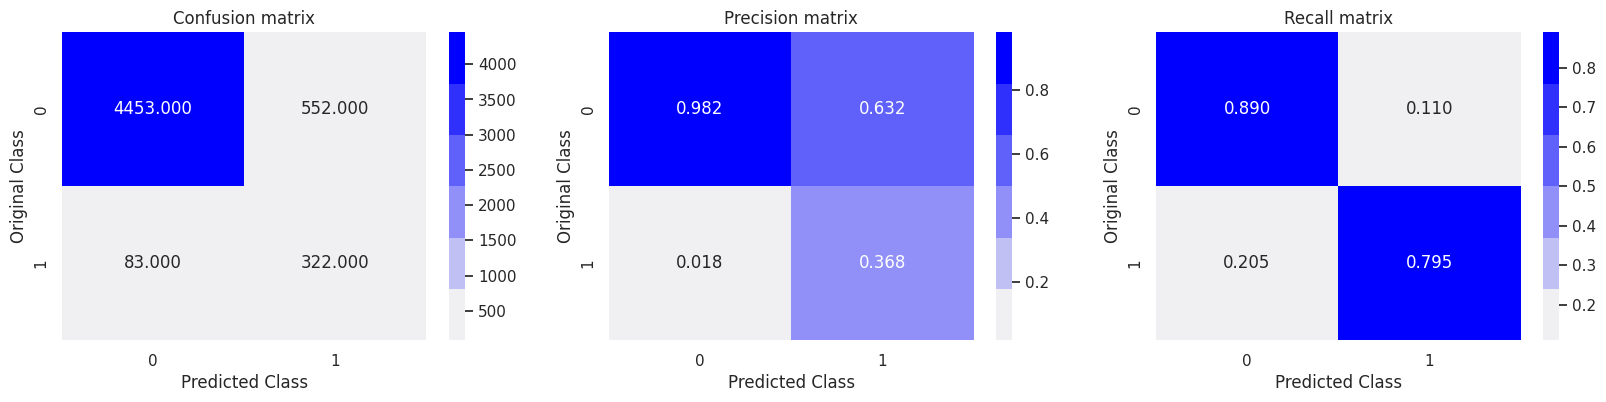

F1 score for train data:  0.5035183737294762
Recall for train data:  0.7950617283950617
Precision for train data:  0.3684210526315789


In [206]:
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

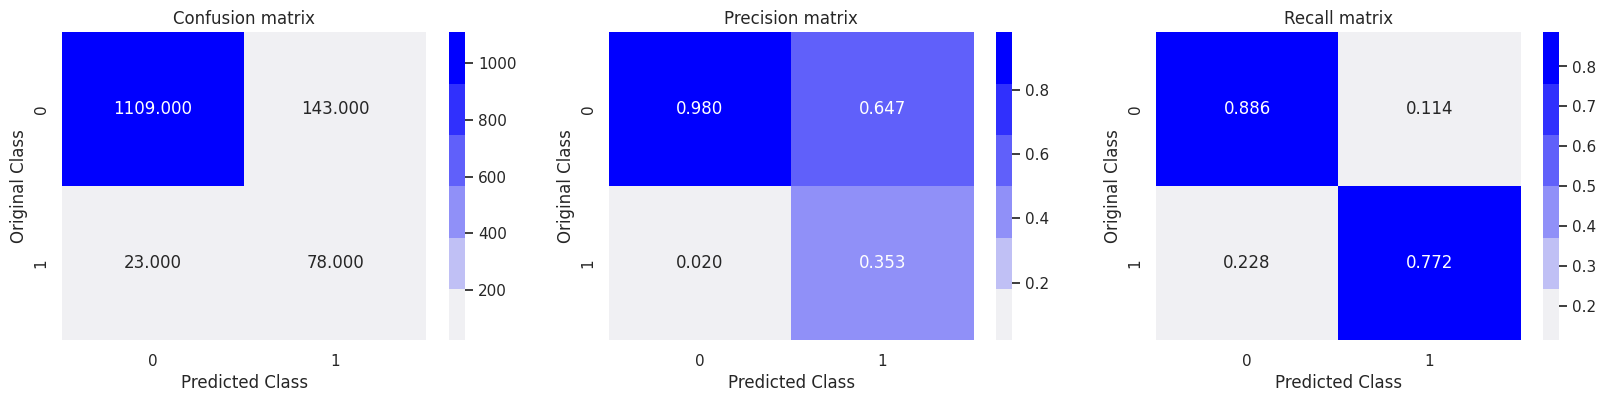

F1 score for test data:  0.484472049689441
Recall for test data:  0.7722772277227723
Precision for test data:  0.35294117647058826


In [207]:
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

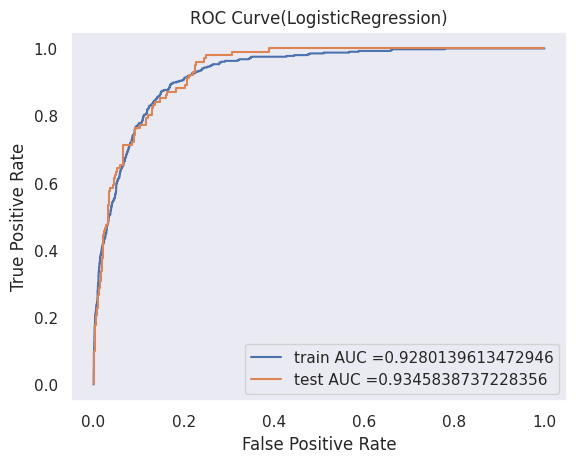

In [208]:
# AUC Score
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_prob[:, 1])
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_prob[:, 1])

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(LogisticRegression)")
plt.grid()
plt.show()

Observations:
Logisitic Regression model gives a better recall score on test dataset i.e no. of False Negative is very less but there is an increase in False Positives which results in less precision.
The no. of false negatives is very low on test set, which meets out business requirement.
Test AUC score is higher than train auc score, the model is able to generalize well.


**SVM After Sampling and Standardizing**








In [209]:
from sklearn.svm import SVC


In [210]:


c_range = np.logspace(-3, 2, 5)
gamma = np.logspace(-2, 3, 15)

clf = GridSearchCV(SVC(class_weight='balanced', probability=True),
                   param_grid = {'C':c_range, 'gamma':gamma},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_bal_train, y_bal)
print("Best F1 score obtained was: ", clf.best_score_)
svm_model = clf.best_estimator_
print(svm_model)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Best F1 score obtained was:  0.866403088586072
SVC(C=5.623413251903491, class_weight='balanced', gamma=1.3894954943731375,
    probability=True)


In [211]:
clf.best_params_


{'C': 5.623413251903491, 'gamma': 1.3894954943731375}

In [212]:
# Train and test predictions
y_train_pred = svm_model.predict(X_bal_train)
y_test_pred = svm_model.predict(X_bal_test)
y_train_prob = svm_model.predict_proba(X_bal_train)
y_test_prob = svm_model.predict_proba(X_bal_test)


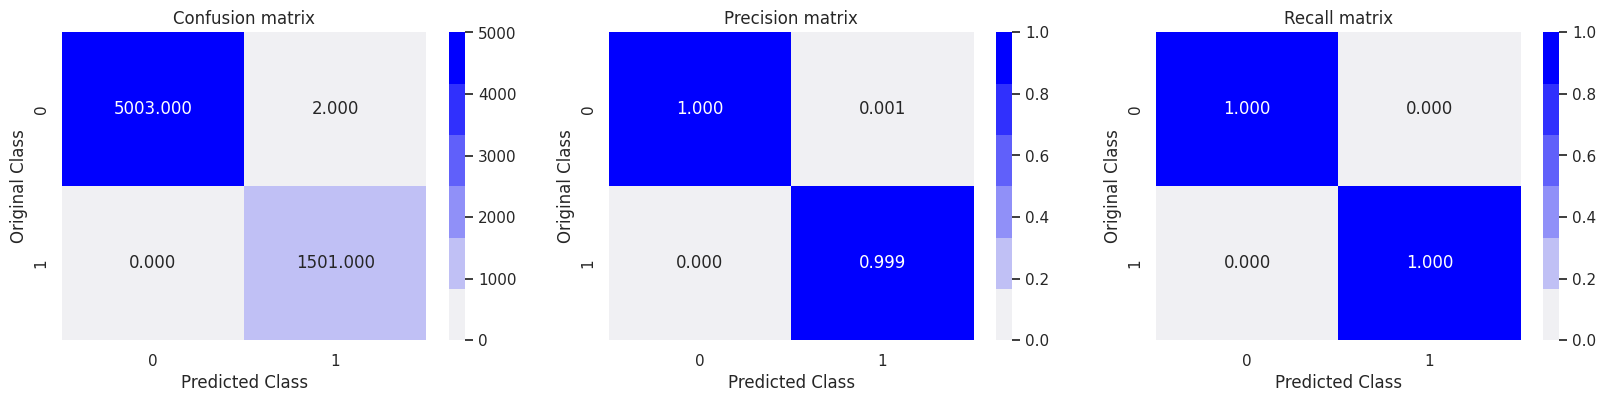

F1 score for train data:  0.9993342210386151
Recall for train data:  1.0
Precision for train data:  0.9986693280106453


In [213]:
plot_confusion_matrix(y_bal, y_train_pred)
print("F1 score for train data: ", f1_score(y_bal, y_train_pred))
print("Recall for train data: ", recall_score(y_bal, y_train_pred))
print("Precision for train data: ", precision_score(y_bal, y_train_pred))

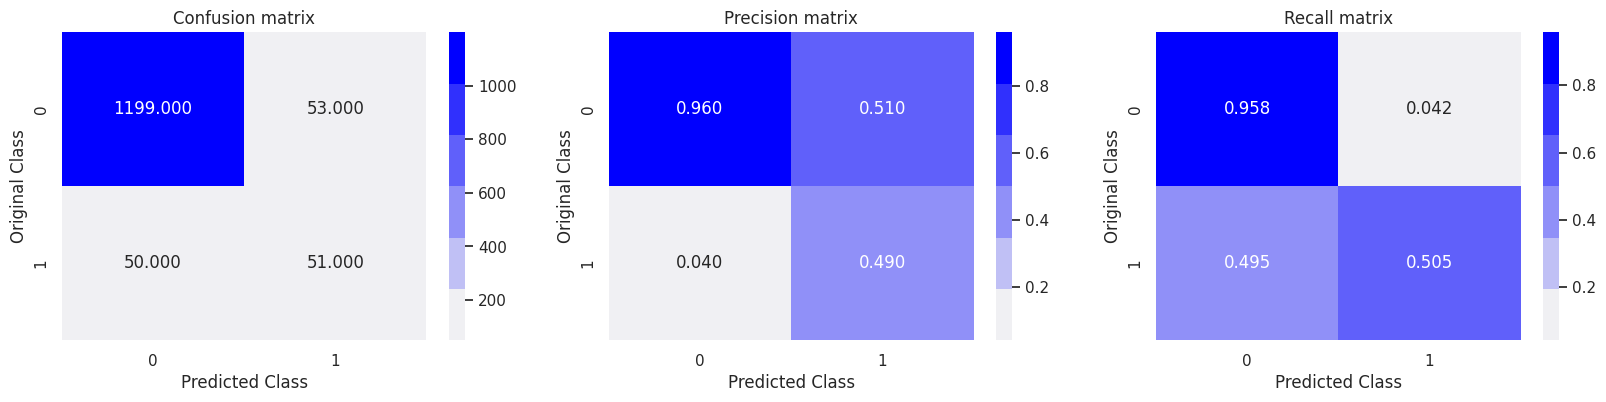

F1 score for test data:  0.49756097560975604
Recall for test data:  0.504950495049505
Precision for test data:  0.49038461538461536


In [225]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

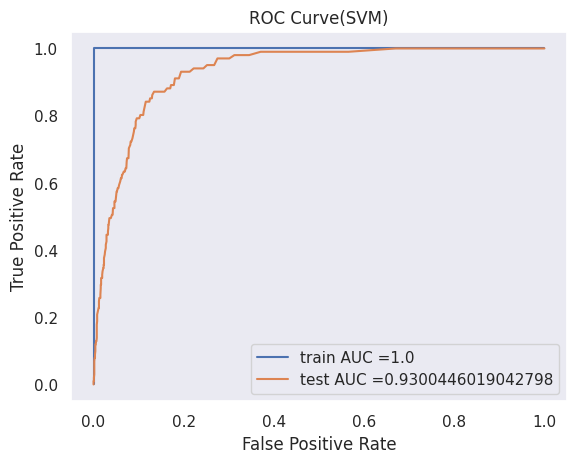

In [224]:
# AUC Score
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_bal, y_train_prob[:, 1])
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_prob[:, 1])

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(SVM)")
plt.grid()
plt.show()

SVM is overfitting on the data, and the performance of Logistic Regression is much better.


**Random Forest after scaling and Standardizing**

In [214]:
from sklearn.ensemble import RandomForestClassifier


In [215]:
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                   param_grid = {'n_estimators': [50, 100, 200, 300, 500, 1000],
                                 'max_depth': [5, 10, 50, None],
                                 'max_features': ['auto', 'sqrt', 'log2']},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_bal_train, y_bal)
print("Best F1 score obtained was: ", clf.best_score_)
forest_model = clf.best_estimator_
print(forest_model)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best F1 score obtained was:  0.833765202686914
RandomForestClassifier(class_weight='balanced', max_depth=50,
                       max_features='auto', n_estimators=200)


In [216]:
y_train_pred = forest_model.predict(X_bal_train)
y_test_pred = forest_model.predict(X_bal_test)
y_train_prob = forest_model.predict_proba(X_bal_train)
y_test_prob = forest_model.predict_proba(X_bal_test)

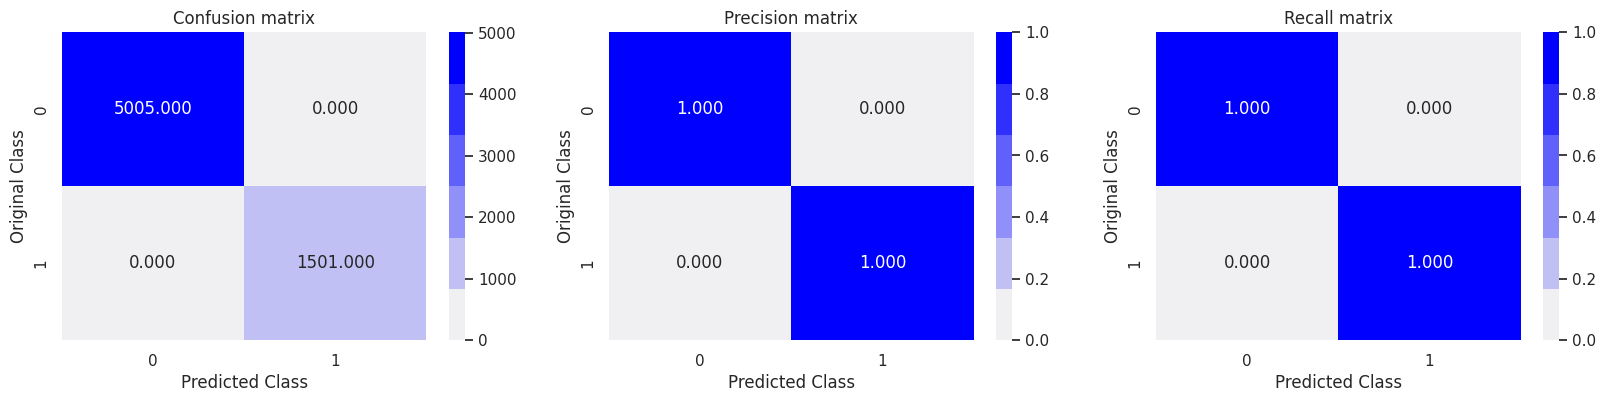

F1 score for train data:  1.0
Recall for train data:  1.0
Precision for train data:  1.0


In [217]:
# Train Data Evaluation
plot_confusion_matrix(y_bal, y_train_pred)
print("F1 score for train data: ", f1_score(y_bal, y_train_pred))
print("Recall for train data: ", recall_score(y_bal, y_train_pred))
print("Precision for train data: ", precision_score(y_bal, y_train_pred))

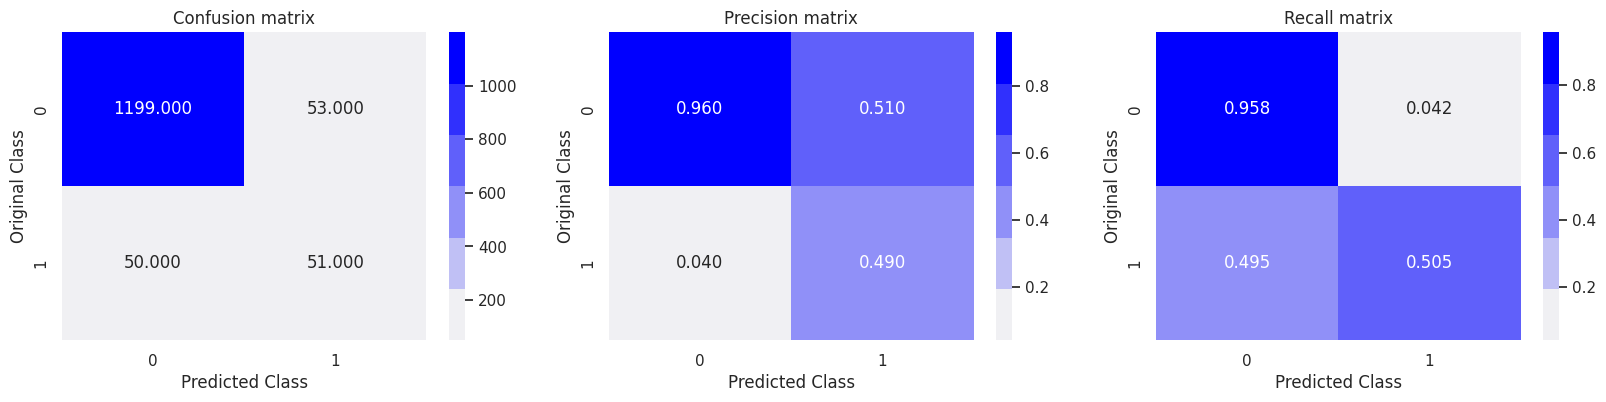

F1 score for test data:  0.49756097560975604
Recall for test data:  0.504950495049505
Precision for test data:  0.49038461538461536


In [218]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

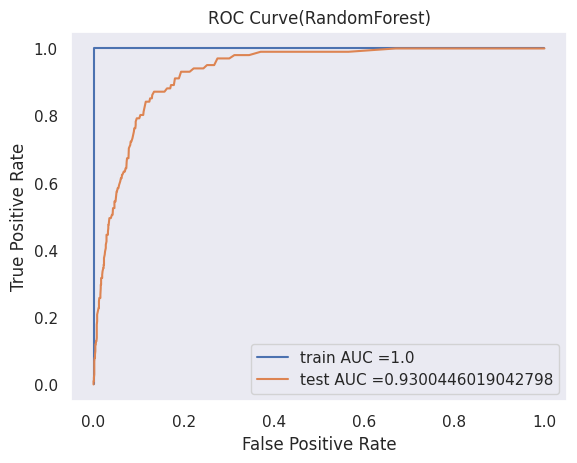

In [219]:
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_bal, y_train_prob[:, 1])
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_prob[:, 1])

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(RandomForest)")
plt.grid()
plt.show()

**Observations:**
RandomForest model overfits on the data, it's performance on test set is better than SVM and Decision Tree but worse than lightgbm.
The best model is Logistic Regression with the highest recall score, and it manages to generalize well without overfitting on the data.

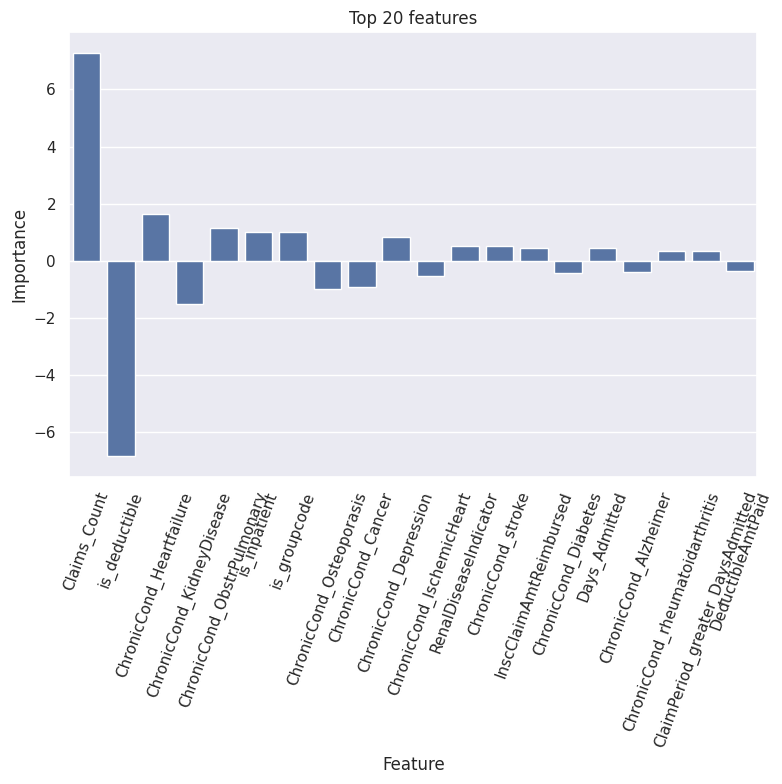

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming best_log_model and X_train are already defined
coef = best_log_model.coef_.tolist()[0]
cols = X_train.columns.tolist()
coef_cols = list(zip(cols, coef))

# Create DataFrame with sorted features by their absolute importance
top_features = pd.DataFrame(sorted(coef_cols, key=lambda x: abs(x[1]), reverse=True), columns=['Feature', 'Importance'])

# Plot the top 20 features
plt.figure(figsize=(8, 8))
sns.barplot(x='Feature', y='Importance', data=top_features.iloc[:20])
plt.xticks(rotation=70)
plt.title("Top 20 features")
plt.tight_layout()
plt.show()


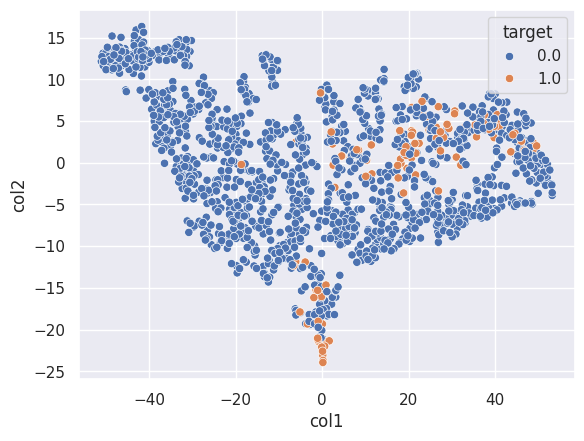

In [223]:
from sklearn.manifold import TSNE
test_data = X_test.values
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(test_data)

df1 = pd.DataFrame(np.hstack([X_embedded, y_test.reshape(-1, 1)]), columns=['col1','col2','target'])

sns.scatterplot(x='col1', y='col2', hue='target', data=df1)
plt.show()

The selected features are able to segregate fraudulent(1) and non-fraudulent(0) providers quite fairly.
There is a slight overlap in +ve and -ve points in some regions, which is hard to differentiate. This explains the mis-classsification of -ve points as +ve by Logistic Regression Model.
A large section of +ve data points are segregated separately.

| Model Name                | Train Recall | Test Recall | Train F1 | Test F1 | Train AUC | Test AUC |
|---------------------------|--------------|-------------|----------|---------|-----------|----------|
| Logistic Regression       | 0.79         | 0.855       | 0.56     | 0.596   | 0.933     | 0.944    |
| SVM                       | 1.0          | 0.414       | 0.999    | 0.425   | 1.0       | 0.872    |
| Random Forest             | 1.0          | 0.611       | 1.0      | 0.613   | 1.0       | 0.94     |
